In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gtsrb-german-traffic-sign/Meta.csv
/kaggle/input/gtsrb-german-traffic-sign/Train.csv
/kaggle/input/gtsrb-german-traffic-sign/Test.csv
/kaggle/input/gtsrb-german-traffic-sign/Meta/37.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/35.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/11.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/31.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/4.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/40.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/33.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/9.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/.~lock.ClassesInformation.ods#
/kaggle/input/gtsrb-german-traffic-sign/Meta/14.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/1.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/39.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/20.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/38.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/2.png
/kaggle/input/gtsrb-german-traffic-sign/Meta/10.png


# GTSRB - German Traffic Sign Recognition Benchmark - Image Classification with CNN

In [123]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, InputLayer, Reshape, MaxPooling2D, Flatten
from tensorflow.keras import layers
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator

import cv2
from PIL import Image
from sklearn.model_selection import train_test_split

## Prepare Dataset for Training

Preparing our dataset for training will involve assigning paths and creating categories(labels)<br>
First we declare our paths to our directories and show how many categories we have

In [98]:
# assign our data, test and train path's and show how many categories there are
data_path = '../input/gtsrb-german-traffic-sign'
train = '../input/gtsrb-german-traffic-sign/Train'
test = '../input/gtsrb-german-traffic-sign/Test'
categories = len(os.listdir(train))
print('Categories:', categories)

Categories: 43


## Create Training Data

Then we go through all our images, read them as arrays, form them to images, resize them and add them to our data and also add the labels

In [110]:
#Get all images and their labels and add them to our lists
data = []
labels = []

for i in range(categories):
    path = data_path + '/Train/' + str(i) #goes through all 43 subfolders of the Train folder
    images = os.listdir(path) #gets a list of entries in our path, so our images

    for img in images: #loops through all images in our path
        try:
            image = cv2.imread(path + '/' + img) #reads the images as arrays
            image_fromarray = Image.fromarray(image, 'RGB') #transforms the arrays to images
            resize_image = image_fromarray.resize((32, 32)) #resizes the images to 32x32
            data.append(np.array(resize_image)) #adds the arrays to our 'data' list
            labels.append(i) #adds the labels to our 'labels' list
        except:
            print("Error in loading image")

## Turn the data and labels into an array

In [145]:
data = np.array(data)
labels = np.array(labels)
data.shape, labels.shape

((39209, 32, 32, 3), (39209,))

## Split X and Y for use in CNN

In [146]:
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42, shuffle=True)
x_train.shape, x_val.shape, y_train.shape, y_val.shape

((31367, 32, 32, 3), (7842, 32, 32, 3), (31367,), (7842,))

## Normalising X and converting labels to categorical data

We know that the pixel values for each image in the dataset are unsigned integers in the range between no color and full color, or 0 and 255.<br>
So to scale them we normalize the pixel values by rescaling them to the range [0,1]

In [147]:
x_train = x_train/255 
x_val = x_val/255

to_categorical() returns a binary matrix representation of the input

In [148]:
y_train = keras.utils.to_categorical(y_train, categories)
y_val = keras.utils.to_categorical(y_val, categories)
y_train.shape, y_val.shape

((31367, 43), (7842, 43))

## Define, compile and train the CNN Model

Our Model is a 2-block VGG model with increasing filters and Dropout regularization and Batch Normalization

In [162]:
# Define Model
model=Sequential()
model.add(InputLayer(input_shape=(32,32,3)))
model.add(Reshape(target_shape=(32,32, 3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu')) # increased filter from 12 to 32
model.add(BatchNormalization()) #added Batch Normalization
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu')) # increased filter from 32 to 64
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization()) #added Batch Normalization
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4)) #increased the dropout percentage from 0.2 to 0.4
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(43, activation='softmax')) #we have 43 categories

In [150]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),optimizer="adam",metrics="accuracy")

In [151]:
# Train model
model.fit(x_train, y_train, batch_size=64, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
491/491 [==============================] - 48s 94ms/step - loss: 0.4833 - accuracy: 0.8723 - val_loss: 0.3697 - val_accuracy: 0.8931
Epoch 2/15
491/491 [==============================] - 41s 83ms/step - loss: 0.0625 - accuracy: 0.9835 - val_loss: 0.0266 - val_accuracy: 0.9948
Epoch 3/15
491/491 [==============================] - 42s 86ms/step - loss: 0.0318 - accuracy: 0.9919 - val_loss: 0.0201 - val_accuracy: 0.9958
Epoch 4/15
491/491 [==============================] - 40s 81ms/step - loss: 0.0234 - accuracy: 0.9938 - val_loss: 0.0272 - val_accuracy: 0.9938
Epoch 5/15
491/491 [==============================] - 42s 85ms/step - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0232 - val_accuracy: 0.9940
Epoch 6/15
491/491 [==============================] - 41s 83ms/step - loss: 0.0163 - accuracy: 0.9951 - val_loss: 0.0210 - val_accuracy: 0.9946
Epoch 7/15
491/491 [==============================] - 40s 81ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0166 - val_accuracy:

In [152]:
_,accuracy=model.evaluate(x_val,y_val)

246/246 [==============================] - 3s 13ms/step - loss: 0.0162 - accuracy: 0.9968


In [168]:
print('Test accuracy:', accuracy*100)

Test accuracy: 99.68120455741882


In [163]:
model.save("my_model.h5")

In [ ]:
test = pd.read_csv(data_path + '/Test.csv')

labels = test["ClassId"].values
imgs = test["Path"].values

data =[]

for img in imgs:
    try:
        image = cv2.imread(data_path + '/' +img)
        image_fromarray = Image.fromarray(image, 'RGB')
        resize_image = image_fromarray.resize((32, 32))
        data.append(np.array(resize_image))
    except:
        print("Error in loading image")
        
x_test = np.array(data)
x_test = x_test/255

pred = model.predict(x_test) 
pred = np.argmax(pred, axis=1)

#Accuracy with the test data
print('Test Data accuracy: ',accuracy_score(labels, pred)*100)

In [171]:
from sklearn.metrics import accuracy_score


y_test = pd.read_csv(data_path + '/Test.csv')

labels = y_test["ClassId"].values
imgs = y_test["Path"].values

data=[]

for img in imgs:
    image = Image.open(data_path + '/' +img)
    image = image.resize((32,32))
    data.append(np.array(image))

    
x_test=np.array(data)

In [175]:
pred = (model.predict(x_test) > 0.5).astype("int32")

In [176]:
model.save('my_model2.h5')

This is a step by step code to show how the Data processing is made (This was for me to understand the code better)

In [99]:
#This is our path
path = data_path + '/Train/' + str(0)
path

'../input/gtsrb-german-traffic-sign/Train/0'

In [100]:
#These are the images in our declared path, listdir() returns a list containing the names of the entries in our path
images = os.listdir(path)
images

['00000_00004_00029.png',
 '00000_00004_00014.png',
 '00000_00000_00006.png',
 '00000_00000_00028.png',
 '00000_00001_00012.png',
 '00000_00001_00010.png',
 '00000_00005_00015.png',
 '00000_00005_00029.png',
 '00000_00002_00020.png',
 '00000_00003_00000.png',
 '00000_00003_00006.png',
 '00000_00005_00007.png',
 '00000_00001_00018.png',
 '00000_00002_00015.png',
 '00000_00002_00014.png',
 '00000_00003_00013.png',
 '00000_00003_00021.png',
 '00000_00005_00019.png',
 '00000_00006_00006.png',
 '00000_00001_00019.png',
 '00000_00002_00028.png',
 '00000_00001_00007.png',
 '00000_00000_00023.png',
 '00000_00005_00005.png',
 '00000_00005_00028.png',
 '00000_00006_00028.png',
 '00000_00001_00028.png',
 '00000_00005_00010.png',
 '00000_00000_00029.png',
 '00000_00006_00022.png',
 '00000_00005_00018.png',
 '00000_00002_00002.png',
 '00000_00004_00005.png',
 '00000_00005_00024.png',
 '00000_00004_00019.png',
 '00000_00004_00000.png',
 '00000_00000_00003.png',
 '00000_00003_00027.png',
 '00000_0000

In [105]:
#Here we read the image with cv2.imread(), which gives us an array as output
image = cv2.imread(path + '/' + images[0])
image

array([[[205, 247, 255],
        [205, 248, 255],
        [203, 247, 255],
        ...,
        [171, 204, 223],
        [171, 203, 220],
        [170, 204, 220]],

       [[214, 255, 255],
        [212, 255, 255],
        [212, 255, 255],
        ...,
        [179, 213, 233],
        [180, 213, 231],
        [179, 214, 231]],

       [[219, 255, 255],
        [217, 255, 255],
        [218, 255, 255],
        ...,
        [185, 220, 241],
        [188, 221, 240],
        [187, 222, 240]],

       ...,

       [[230, 255, 255],
        [229, 255, 255],
        [227, 255, 255],
        ...,
        [157, 187, 199],
        [153, 185, 199],
        [151, 184, 200]],

       [[229, 255, 255],
        [227, 255, 255],
        [226, 255, 255],
        ...,
        [156, 187, 204],
        [154, 186, 204],
        [154, 186, 205]],

       [[227, 255, 255],
        [224, 255, 255],
        [224, 255, 255],
        ...,
        [156, 189, 202],
        [155, 188, 204],
        [158, 189, 207]]

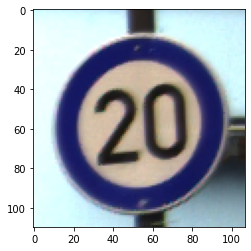

In [106]:
#with imshow we can show the image
image_imread = cv2.imread(path + '/' + images[0])
plt.imshow(image_imread);

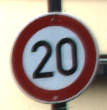

In [107]:
#We can also show our image with Image.open
image_open = Image.open(path + '/' + images[0])
image_open

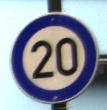

In [108]:
#Or we can form our image from an array with Image.fromarray
image_fromarray = Image.fromarray(image, 'RGB')
image_fromarray

In [115]:
#With this we can tranform an image to an array
from tensorflow.keras.preprocessing.image import img_to_array
img_array = img_to_array(image)
img_array

array([[[ 90.,  91.,  99.],
        [110., 108., 102.],
        [135., 128., 107.],
        ...,
        [ 53.,  61.,  48.],
        [ 98., 112.,  82.],
        [ 67.,  88.,  85.]],

       [[ 77.,  82.,  83.],
        [105., 102.,  93.],
        [135., 122., 103.],
        ...,
        [ 87., 111., 111.],
        [126., 145., 135.],
        [ 86., 100.,  97.]],

       [[113., 106., 101.],
        [133., 116., 105.],
        [161., 147., 129.],
        ...,
        [ 47.,  62.,  76.],
        [ 55.,  63.,  73.],
        [ 62.,  64.,  61.]],

       ...,

       [[ 91.,  93.,  93.],
        [ 95.,  99., 104.],
        [ 91., 102., 113.],
        ...,
        [ 89.,  98., 101.],
        [ 84.,  96., 100.],
        [ 83.,  98., 105.]],

       [[ 84.,  90.,  87.],
        [ 88.,  99., 106.],
        [ 68.,  82.,  99.],
        ...,
        [ 86.,  95.,  97.],
        [ 87.,  96.,  98.],
        [ 90.,  99., 103.]],

       [[ 78.,  88.,  83.],
        [ 81.,  99., 105.],
        [ 45.,  

In [109]:
#With this we resize the image to a specific width and height
resize_image = image_fromarray.resize((32,32))
resize_image